# Part I - (Prosper Loan Dataset Exploration)
## by (Emmanuel Chukwuka Oraegbu)

## Introduction
> This data set is a record of loans given out by Prosper, a loan company in the United states of America. The Loan records contained in this data set began from 2005 to 2014, and contains records of 113,937 loans in total. 


## Objective
> The objective of this investigation is to analyze the performance of loans by looking at  the dataset in terms of completed repayments, profits and return on investments and looking at various trends and factors which may be responsible for high performance or failure of loans.

## Importations and settings initialization
In this section we are going to import all the necessary libraries, set all the appropriate warnings and define all necessary functions

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from wordcloud import WordCloud

%matplotlib inline

In [2]:
# Set warnings to ignore filter warnings
warnings.filterwarnings('ignore')

In [3]:
# For better assessment set pandasdf not to collapse rows and columns when displaying them
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [4]:
# Error:
# SettingWithCopyWarning: A value is trying to be set on a copy of a
# slice from a df

# As explained in the Source, this warning is usually safe to ignore. You
# can disable it by running the following:
pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
#store different color in variables for later use
dark_blue = sb.color_palette()[0]
orange = sb.color_palette()[1]
green =  sb.color_palette()[2]
red = sb.color_palette()[3]
purple = sb.color_palette()[4]
brown = sb.color_palette()[5]
grey = sb.color_palette()[7]

In [6]:
# A function to plot a pie chart
def pie_chart(counts, plot_startangle = 0, bar_counterclock = False, title = None, pfont = 12, 
             title_fontsize = 18, fig_size = (8,8)):
    label = counts.index
    plt.figure(figsize = fig_size);
    plt.pie(counts, startangle = plot_startangle, counterclock = bar_counterclock, autopct='%.3f%%' )
    plt.legend(labels = label, fontsize = pfont, loc= 'center right', bbox_to_anchor =(1.2, 0.5))
    plt.title(title.upper(), fontsize = title_fontsize)
    plt.axis('square');

In [7]:
# define a func to plot hist
def sb_histogram(df, xa = None, ya = None, title = None, title_font_size = 18,
              x_label = None, y_label = None, pfont = 12, plot_bin_number = 500, color = None, 
              tfont = 12, fig_size = (15,5)):
    plt.figure(figsize=fig_size)
    plot = sb.histplot(data = df, x = xa, bins = plot_bin_number, 
                       color = color)
    plt.title('' if title == None else title.upper(), fontsize = title_font_size)
    plt.xticks(fontsize = tfont)
    plt.yticks(fontsize =  tfont)
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont);


In [8]:
def plt_histogram(df, xa = None, ya = None, bin_num = 1000, title = None, title_font_size = 18,
                 x_label = None, y_label = None, pfont = 12, color = None, tfont = 12, 
                  fig_size = (15,5), bin_edge = 0):
    bin = np.arange(bin_edge, df[ya if xa == None else xa].max()+bin_num, bin_num)
    plt.figure(figsize = fig_size)
    plt.hist(data = prosper, x = xa, bins = bin);
    plt.title('' if title == None else title.upper(), fontsize = title_font_size)
    plt.xticks(fontsize = tfont)
    plt.yticks(fontsize =  tfont)
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont);

In [9]:
# a func to plot a univariate countplot
def bar_chart(df, xa= None, ya = None, title = None, order = None, color = None, 
               tick_rotation = None, pfont = None, tfont = 12, x_label = None, y_label = None, 
               plot_hue = None, title_fontsize = 18, fig_size = (15,5), bartext_fontsize = 12):
    if plot_hue == None:
    #This is for plotting univariate count plots  
    
        plt.rcParams["figure.figsize"] = list(fig_size)
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams['font.size'] = bartext_fontsize
        plot = sb.countplot(data = df, x = xa, y = ya, order = order, color = color)
        for p in plot.patches:
            #plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5))
            plot.text(p.get_x(), p.get_height(), '{:.0f}'.format(p.get_height(), va = 'center', ha = 'center',  fontdict = None,))
        plt.title(title) if title == None else plt.title(title.upper(), fontsize = title_fontsize)
        plt.xticks(fontsize = tfont, rotation = tick_rotation)
        plt.yticks(fontsize = tfont)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = 12 if pfont == None else pfont)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = 12 if pfont == None else pfont);
        plt.plot()
    else:
        #This would plot bivariate count plots or bar charts
        plt.rcParams["figure.figsize"] = list(fig_size)
        plt.rcParams["figure.autolayout"] = True
        plt.rcParams['font.size'] = bartext_fontsize
        plot = sb.countplot(data = df, hue = plot_hue, x = xa, y = ya, order = order, color = color)
        for p in plot.patches:
            plot.text(p.get_x(), p.get_height(), '{:.0f}'.format(p.get_height(), va = 'center', ha = 'center',  fontdict = None,))
            #plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
        plt.title(title) if title == None else plt.title(title.upper(), fontsize = title_fontsize)
        plt.xticks(rotation = tick_rotation)
        plt.xticks(fontsize = 12 if tfont == None else tfont, rotation = tick_rotation)
        plt.yticks(fontsize = 12 if tfont == None else tfont)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont);
        plt.tight_layout()
        plt.plot()
plt.show();

In [10]:
# define a func to plot kernel density estimate
def kde(df, xa = None, ya = None, title = None, x_label = None, y_label = None, 
             should_fill = False, pfont = 12, tfont = None ):
    #dataset = sb.load_dataset('df')
    plt.figure(figsize=(15,5))
    sb.kdeplot(data = df, x = xa, y = ya, fill = should_fill)
    plt.title('' if title == None else title.upper(), fontsize = pfont)
    plt.xticks(fontsize = 12 if tfont == None else tfont)
    plt.yticks(fontsize = 12 if tfont == None else tfont)
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont);

In [11]:
def plot_word_count( text, title = None, pfont = 12, plot_width = None, plot_height= None, plot_margin=None, 
                    prefer_horizontal=0.9,  background_color=None, mode='RGBA', relative_scaling='auto', collocations=True, 
                    colormap=None, normalize_plurals=True,  plot_contour_color='black', x_label = None, y_label = None,
                    max_pfont = 12, fig_size =(15,5)):
    # Generate a word cloud image
    wordcloud = WordCloud(background_color, max_font_size = max_pfont).generate(text)
    plt.figure(figsize= fig_size)
    plt.suptitle('' if title == None else title.upper(), fontsize= pfont)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
    plt.axis('off')
    plt.show();

In [12]:
def sb_scatter_plot(df, xa = None, ya = None, title = None, title_font_size = 18, x_label = None, 
             y_label = None, pfont = 12, color = None, tfont = 12, fig_size = (15,5),
#if you want to plot a regplot, you supply the regplot title and regplot = True
                    reg_plot = False, reg_title = None, plot_hue = None):

    if plot_hue == None:
        plt.figure(figsize=fig_size)
        plot = sb.scatterplot(data = df, x = xa, y = ya)
        plt.title('' if title == None else title.upper(), fontsize = title_font_size)
        plt.xticks(fontsize = tfont)
        plt.yticks(fontsize =  tfont)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
        plt.show();
        if reg_plot == True:
            plot = sb.regplot(data = df, x = xa, y = ya)
            plt.title('' if reg_title == None else reg_title.upper(), fontsize = title_font_size)
            plt.xticks(fontsize = tfont)
            plt.yticks(fontsize =  tfont)
            plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
            plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
            plt.show();
    else:
        plt.figure(figsize=fig_size)
        plot = sb.scatterplot(data = df, x = xa, y = ya, hue = plot_hue)
        plt.title('' if title == None else title.upper(), fontsize = title_font_size)
        plt.xticks(fontsize = tfont)
        plt.yticks(fontsize =  tfont)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
        plt.show();

In [13]:
def plot_heat_map(df, columns =(), title = None, title_font_size = 18,x_label = None, 
                  y_label = None, pfont = 12, color = None, tfont = 12, fig_size = (15,15)):
    plt.figure(figsize=fig_size)
    sb.set()
    dataset = sb.load_dataset(df)
    dataset = dataset.map(pivot, columns)
    sb.heatmap(dataset)
    plt.title('' if title == None else title.upper(), fontsize = title_font_size)
    plt.xticks(fontsize = tfont)
    plt.yticks(fontsize =  tfont)
    plt.show();

In [14]:
'''
Make sure to fill out null values before proceeding to plot your visualizations with this function
Plot the categorical variable on the xa
'''
def violin(df, xa = None, ya = None, title = None, title_font_size = 18,
              x_label = None, y_label = None, pfont = 12, color = None, tfont = 12, 
                     fig_size = (15,10), tick_rotation = None, univariate = False, bivariate = False):
#the categorical/qualitative variable must be the xa
# we are going to use occupation and estimatedreturn to test this function
#types of occupation 
#Prepare the categorical data for analysis by changing the datatype
    if univariate == True:
        plt.figure(figsize=fig_size)
        sb.violinplot(data= df, x= xa,)
        plt.title('' if title == None else title.upper(), fontsize = title_font_size)
        plt.xticks(fontsize = tfont, rotation = tick_rotation)
        plt.yticks(fontsize =  tfont)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
        plt.show();
    elif bivariate == True:
        variable_classes = df[xa].unique()
        _classes = pd.api.types.CategoricalDtype(ordered = True, categories = variable_classes)
        df[xa] = df[xa].astype(_classes)
        plt.figure(figsize=fig_size)
        sb.violinplot(data= df, x= xa, y= ya)
        plt.title('' if title == None else title.upper(), fontsize = title_font_size)
        plt.xticks(fontsize = tfont, rotation = tick_rotation)
        plt.yticks(fontsize =  tfont)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
        plt.show();
    else:
        return('please set univariate = True if you are plotting a single variable or bivariate = True for two variables')
    


In [15]:
# box plots are used to show the relationship between a qualitative and a numerical variable
# xa must be the categorical variable 
'''
Make sure to fill out null values before proceeding to plot your visualizations with this function
The categorical variable must be assigned to the xa
horizontal is used to change the axis of the plot
we can plot univariate box plots by setting the univariate argument to True
'''
def box_plot(df, xa= None, ya = None, title = None, color = None, tick_rotation = None, 
                 pfont = None, tfont =12 , x_label = None, y_label = None, fig_size =(15,10), 
                 horizontal = False, univariate = False, bivariate = False):
    if univariate == True:
        plt.figure(figsize = fig_size)
        sb.boxplot(data = df, x = xa, color = color)
        plt.title(title) if title == None else plt.title(title.upper(), fontsize = 18 if pfont == None else pfont)
        plt.xticks(rotation = tick_rotation)
        plt.xticks(fontsize = 12 if tfont == None else tfont)
        plt.yticks(fontsize = 12 if tfont == None else tfont)
        plt.xlabel('' if x_label == None else x_label.upper(), fontsize = 12 if pfont == None else pfont)
        plt.ylabel('' if y_label == None else y_label.upper(), fontsize = 12 if pfont == None else pfont);
        plt.tight_layout()
        plt.show();
    elif bivariate == True:
        #Prepare the categorical data for analysis by changing the datatype
        variable_classes = df[xa].unique()
        _classes = pd.api.types.CategoricalDtype(ordered = True, categories = variable_classes)
        df[xa] = df[xa].astype(_classes)    
        if horizontal == True:
                plt.figure(figsize = fig_size)
                sb.boxplot(data = df, y = xa, x = ya, color = color)
                plt.title(title) if title == None else plt.title(title.upper(), fontsize = 18 if pfont == None else pfont)
                plt.xticks(rotation = tick_rotation)
                plt.xticks(fontsize = 12 if tfont == None else tfont)
                plt.yticks(fontsize = 12 if tfont == None else tfont)
                plt.xlabel('' if x_label == None else x_label.upper(), fontsize = 12 if pfont == None else pfont)
                plt.ylabel('' if y_label == None else y_label.upper(), fontsize = 12 if pfont == None else pfont);
                plt.tight_layout()
                plt.show();
        else:
                plt.figure(figsize = fig_size)
                sb.boxplot(data = df, x = xa, y = ya)
                plt.title(title) if title == None else plt.title(title.upper(), fontsize = 18 if pfont == None else pfont)
                plt.xticks(rotation = tick_rotation)
                plt.xticks(fontsize = 12 if tfont == None else tfont)
                plt.yticks(fontsize = 12 if tfont == None else tfont)
                plt.xlabel('' if x_label == None else x_label.upper(), fontsize = 12 if pfont == None else pfont)
                plt.ylabel('' if y_label == None else y_label.upper(), fontsize = 12 if pfont == None else pfont);
                plt.tight_layout()
                plt.show();
    else:
        return('Warning! please set univariate = True if you are plotting a single variable or bivariate = True for two variables')

    

In [16]:
def faceting(df, xa = None, ya = None, title = None, title_font_size = 18,
              x_label = None, y_label = None, pfont = 12, color = None, tfont = 12, 
                     fig_size = (15,10), ordered = False):
    '''
    Always assign the categorical variable to the xa
    facets can be plotted in order of increasing means by using the argument ordered = True
    '''
    #Prepare the categorical data for analysis by changing the datatype
    variable_classes = df[xa].unique()
    _classes = pd.api.types.CategoricalDtype(ordered = True, categories = variable_classes)
    df[xa] = df[xa].astype(_classes)
    
    group_means = df[[xa, ya]].groupby([xa]).mean()
    group_order = group_means.sort_values([ya], ascending = False).index

    
    plt.figure(figsize=fig_size)
    g = sb.FacetGrid(data = df, col = xa, col_wrap = 4, col_order = group_order if ordered == True else None)
    g.map(plt.hist, ya);
    
    plt.title('' if title == None else title.upper(), fontsize = title_font_size)
    plt.xticks(fontsize = tfont)
    plt.yticks(fontsize =  tfont)
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
    plt.show();

In [17]:
def line_plot(df, xa = None, ya = None, title = None, title_font_size = 18,
              x_label = None, y_label = None, pfont = 12, color = None, tfont = 12, 
                     fig_size = (15,10)):
    plt.figure(figsize = fig_size)
    plt.title('' if title == None else title.upper(), fontsize = title_font_size)
    sb.lineplot(data =df, x = xa, y = ya)
    plt.xticks(fontsize = tfont)
    plt.yticks(fontsize =  tfont)
    plt.xlabel('' if x_label == None else x_label.upper(), fontsize = pfont)
    plt.ylabel('' if y_label == None else y_label.upper(), fontsize = pfont)
    plt.show();

In [18]:
# load in the dataset into a pandas df and make a copy of the df
loan_df = pd.read_csv('prosperLoanData.csv')
prosper = loan_df.copy()

## Preliminary Wrangling

In [19]:
prosper.head(10)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   
8         NaN    36    Current                  NaN      0.07620   
9         NaN    36    Current                  NaN      0.07620   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   
5        0.1314       0.1214                  0.11567         0.0449   
6        0.2712       0.2612                  0.23820         0.1275   
7        0.2019       0.1919                  0.17830         0.0799   
8        0.0629       0.0529                  0.05221         0.0099   
9        0.0629       0.0529                  0.05221         0.0099   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   
5          0.07077                      5.0                     B   
6          0.11070                      2.0                     E   
7          0.09840                      4.0                     C   
8          0.04231                      7.0                    AA   
9          0.04231                      7.0                    AA   

   ProsperScore  ListingCategory (numeric) BorrowerState      Occupation  \
0           NaN                          0            CO           Other   
1           7.0                          2            CO    Professional   
2           NaN                          0            GA           Other   
3           9.0                         16            GA   Skilled Labor   
4           4.0                          2            MN       Executive   
5          10.0                          1            NM    Professional   
6           2.0                          1            KS  Sales - Retail   
7           4.0                          2            CA         Laborer   
8           9.0                          7            IL    Food Service   
9          11.0                          7            IL    Food Service   

  EmploymentStatus  EmploymentStatusDura

In [20]:
prosper.tail(10)

ListingKey  ListingNumber            ListingCreationDate  \
113927  E3433419834735803891976         322787  2008-04-30 21:25:19.670000000   
113928  E34935176664905343E01EA         510097  2011-06-06 19:02:44.443000000   
113929  E3553583161337791FCB87F         830413  2013-07-06 17:40:01.657000000   
113930  E35D3584034795373BCD69A         831523  2013-07-08 10:24:49.700000000   
113931  E36F36005339663245C20F8        1141292  2014-01-16 20:13:08.040000000   
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

       CreditGrade  Term              LoanStatus           ClosedDate  \
113927          AA    36               Completed  2011-05-09 00:00:00   
113928         NaN    36               Completed  2011-09-19 00:00:00   
113929         NaN    36               Completed  2014-02-07 00:00:00   
113930         NaN    36                 Current                  NaN   
113931         NaN    60                 Current                  NaN   
113932         NaN    36                 Current                  NaN   
113933         NaN    36  FinalPaymentInProgress                  NaN   
113934         NaN    60                 Current                  NaN   
113935         NaN    60               Completed  2013-08-13 00:00:00   
113936         NaN    36                 Current                  NaN   

        BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
113927      0.07469        0.0679       0.0579                      NaN   
113928      0.22362        0.1899       0.1799                  0.17570   
113929      0.30285        0.2639       0.2539                  0.23180   
113930      0.20053        0.1639       0.1539                  0.14520   
113931      0.15016        0.1274       0.1174                  0.11210   
113932      0.22354        0.1864       0.1764                  0.16490   
113933      0.13220        0.1110       0.1010                  0.10070   
113934      0.23984        0.2150       0.2050                  0.18828   
113935      0.28408        0.2605       0.2505                  0.24450   
113936      0.13189        0.1039       0.0939                  0.09071   

        EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  \
113927            NaN              NaN                      NaN   
113928         0.0610          0.11470                      4.0   
113929         0.1225          0.10930                      2.0   
113930         0.0574          0.08780                      5.0   
113931         0.0424          0.06970                      5.0   
113932         0.0699          0.09500                      4.0   
113933         0.0200          0.08070                      6.0   
113934         0.1025          0.08578                      3.0   
113935         0.0850          0.15950                      4.0   
113936         0.0299          0.06081                      6.0   

       ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)  \
113927                   NaN           NaN                          4   
113928                     C           6.0                          3   
113929                     E           3.0                          2   
113930                     B           6.0                          1   
113931                     B           6.0                          3   
113932                     C           5.0                          1   
113933                     A           8.0                          7   
113934                     D           3.0                          1   
113935                     C           5.0                          2   
113936                     A   

In [21]:
prosper.shape

(113937, 81)

In [22]:
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [23]:
prosper.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
count             84853.000000  84853.000000              113937.000000   
mean                  4.072243      5.950067                   2.774209   
std                   1.673227      2.376501                   3.996797   
min                   1.000000      1.000000                   0.000000   
25%                   3.000000      4.000000                   1.000000   
50%                   4.000000      6.000000                   1.000000   
75%                   5.000000      8.000000                   3.000000   
max                   7.000000     11.000000                  20.000000   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
count             106312.000000          113346.000000          113346.000000   
mean                  96.071582             685.567731             704.567731   
std                   94.480605              66.458275              66.458275   
min                    0.000000               0.000000              19.000000   
25%                   26.000000             660.000000             679.000000   
50%                   67.000000             680.000000             699.000000   
75%                  137.000000             720.000000             739.000000   
max                  755.000000             880.000000             899.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count       106333.000000    106333.000000               113240.000000   
mean            10.317192         9.260164                   26.754539   
std              5.457866         5.022644                   13.637871   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   17.000000   
50%             10.000000         9.000000                   25.000000   
75%             13.000000        12.000000                   35.000000   
max             59.000000        54.000000                  136.000000   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
count           113937.00000                113937.000000   
mean                 6.96979                   398.292161   
std                  4.63097                   447.159711   
min                  0.00000                     0.000000   
25%                  4.00000                   114.000000   
50%                  6.00000                   271.000000   
75%                  9.00000                   525.000000   
max                 51.00000                 14985.000000   

       InquiriesLast6Months  Tot

In [24]:
prosper.duplicated().sum()

0

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan.

>* ListingKey	Unique key for each listing, same value as the 'key' used in the listing object in the API.
>* ListingNumber	The number that uniquely identifies the listing to the public as displayed on the website.
-ListingCreationDate	The date the listing was created.
-CreditGrade	The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
-Term	The length of the loan expressed in months.
-LoanStatus	The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, ---- -PastDue. The PastDue status will be accompanied by a delinquency bucket.
-ClosedDate	Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses. 
-BorrowerAPR	The Borrower's Annual Percentage Rate (APR) for the loan.
-BorrowerRate	The Borrower's interest rate for this loan. 
-LenderYield	The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
-EstimatedEffectiveYield	Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.
-EstimatedLoss	Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.
-EstimatedReturn	The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.
-ProsperRating (numeric)	The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4  C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
-ProsperRating (Alpha)	The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
-ProsperScore	A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
-ListingCategory	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - --Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
-BorrowerState	The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
-Occupation	The Occupation selected by the Borrower at the time they created the listing.
-EmploymentStatus	The employment status of the borrower at the time they posted the listing.
-EmploymentStatusDuration	The length in months of the employment status at the time the listing was created.
-IsBorrowerHomeowner	A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
-CurrentlyInGroup	Specifies whether or not the Borrower was in a group at the time the listing was created.
-GroupKey	The Key of the group in which the Borrower is a member of. Value will be null if the borrower does not have a group affiliation.
-DateCreditPulled	The date the credit profile was pulled. 
-CreditScoreRangeLower	The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
-CreditScoreRangeUpper	The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 
-FirstRecordedCreditLine	The date the first credit line was opened.
-CurrentCreditLines	Number of current credit lines at the time the credit profile was pulled.
-OpenCreditLines	Number of open credit lines at the time the credit profile was pulled.
-TotalCreditLinespast7years	Number of credit lines in the past seven years at the time the credit profile was pulled.
-OpenRevolvingAccounts	Number of open revolving accounts at the time the credit profile was pulled.
-OpenRevolvingMonthlyPayment	Monthly payment on revolving accounts at the time the credit profile was pulled.
-InquiriesLast6Months	Number of inquiries in the past six months at the time the credit profile was pulled.
-TotalInquiries	Total number of inquiries at the time the credit profile was pulled.
-CurrentDelinquencies	Number of accounts delinquent at the time the credit profile was pulled.
-AmountDelinquent	Dollars delinquent at the time the credit profile was pulled.
-DelinquenciesLast7Years	Number of delinquencies in the past 7 years at the time the credit profile was pulled.
-PublicRecordsLast10Years	Number of public records in the past 10 years at the time the credit profile was pulled.
-PublicRecordsLast12Months	Number of public records in the past 12 months at the time the credit profile was pulled.
-RevolvingCreditBalance	Dollars of revolving credit at the time the credit profile was pulled.
-BankcardUtilization	The percentage of available revolving credit that is utilized at the time the credit profile was pulled.
-AvailableBankcardCredit	The total available credit via bank card at the time the credit profile was pulled.
-TotalTrades	Number of trade lines ever opened at the time the credit profile was pulled.
-TradesNeverDelinquent	Number of trades that have never been delinquent at the time the credit profile was pulled.
-TradesOpenedLast6Months	Number of trades opened in the last 6 months at the time the credit profile was pulled.
-DebtToIncomeRatio	The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
-IncomeRange	The income range of the borrower at the time the listing was created.
-IncomeVerifiable	The borrower indicated they have the required documentation to support their income.
-StatedMonthlyIncome	The monthly income the borrower stated at the time the listing was created.
-LoanKey	Unique key for each loan. This is the same key that is used in the API. 
-TotalProsperLoans	Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 
-TotalProsperPaymentsBilled	Number of on time payments the borrower made on Prosper loans at the time they created this listing. This value will be null if the borrower had no prior loans.
-OnTimeProsperPayments	Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans.
-ProsperPaymentsLessThanOneMonthLate	Number of payments the borrower made on Prosper loans that were less than one month late at the time they created this listing. This value will be null if the borrower had no prior loans. 
-ProsperPaymentsOneMonthPlusLate	Number of payments the borrower made on Prosper loans that were greater than one month late at the time they created this listing. This value will be null if the borrower had no prior loans.
-ProsperPrincipalBorrowed	Total principal borrowed on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.
-ProsperPrincipalOutstanding	Principal outstanding on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.
-ScorexChangeAtTimeOfListing	Borrower's credit score change at the time the credit profile was pulled. This will be the change relative to the borrower's last Prosper loan. This value will be null if the borrower had no prior loans.
-LoanCurrentDaysDelinquent	The number of days delinquent. 
-LoanFirstDefaultedCycleNumber	The cycle the loan was charged off. If the loan has not charged off the value will be null. 
-LoanMonthsSinceOrigination	Number of months since the loan originated.
-LoanNumber	Unique numeric value associated with the loan.
-LoanOriginalAmount	The origination amount of the loan.
-LoanOriginationDate	The date the loan was originated.
-LoanOriginationQuarter	The quarter in which the loan was originated.
-MemberKey	The unique key that is associated with the borrower. This is the same identifier that is used in the API member object. 
-MonthlyLoanPayment	The scheduled monthly loan payment.
-LP_CustomerPayments	Pre charge-off cumulative gross payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.
-LP_CustomerPrincipalPayments	Pre charge-off cumulative principal payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.
-LP_InterestandFees	Pre charge-off cumulative interest and fees paid by the borrower. If the loan has charged off, this value will exclude any recoveries.
-LP_ServiceFees	Cumulative service fees paid by the investors who have invested in the loan. 
-LP_CollectionFees	Cumulative collection fees paid by the investors who have invested in the loan.
-LP_GrossPrincipalLoss	The gross charged off amount of the loan.
-LP_NetPrincipalLoss	The principal that remains uncollected after any recoveries.
-LP_NonPrincipalRecoverypayments	The interest and fee component of any recovery payments. The current payment policy applies payments in the following order: Fees, interest, principal.
-PercentFunded	Percent the listing was funded.
-Recommendations	Number of recommendations the borrower had at the time the listing was created.
-InvestmentFromFriendsCount	Number of friends that made an investment in the loan.
-InvestmentFromFriendsAmount	Dollar amount of investments that were made by friends.
-Investors	The number of investors that funded the loan.


### What is/are the main feature(s) of interest in your dataset?

>variables of interests include isborrowerhomeowner, creditgrade, prosperrating (alpha), credit_rating(a combination of creditgrade and prosperrating drop these tables after), loanstatus, borrowerapr, borrowerrate, loanoriginalamount, estimated return, estimatedloss etc

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>

## Cleaning Operations

In [25]:
# Change column names to lower case.
prosper.rename(columns = str.lower, inplace = True)

In [26]:
#Fill the null borrower apr values with the mean 
prosper['borrowerapr'] = prosper['borrowerapr'].fillna(prosper['borrowerapr'].mean())

In [27]:
# fill null occupation with 'others'
prosper['occupation'].fillna('Others', inplace = True)

In [28]:
#fill null values in borrowerstate with 'unlisted'
prosper['borrowerstate'].fillna('unlisted', inplace = True)

In [29]:
# Check listingkey for duplicates and drop any duplicates found
prosper[prosper['listingkey'].duplicated()]

listingkey  listingnumber            listingcreationdate  \
9       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
999     0A0635972629771021E38F3        1055932  2013-12-18 14:25:17.053000000   
2539    2D2635984503681189056B4        1097584  2014-01-11 07:50:08.037000000   
4942    4B7E3590031274113F1FD34         927246  2013-09-26 09:35:36.317000000   
5812    94B035909835592957503E6         920397  2013-09-24 13:27:48.287000000   
5971    2EC635885737984509D5366         894748  2013-09-16 06:59:12.297000000   
6385    083235967773321272C26B9        1066466  2013-12-10 13:39:07.220000000   
7415    5A2F35875117483773421B0         875616  2013-08-21 07:25:22.360000000   
7538    09AD35918712001025AC1BD         969821  2013-10-24 13:21:31.607000000   
7555    021F3593082999771F5E621         970570            2013-11-01 13:53:22   
8683    8E8B35952875791221BB463        1047993  2013-11-25 08:46:13.073000000   
8925    359F36006583392169BF3F3        1138422  2014-01-14 16:09:07.770000000   
9102    9A4A36004039348126F769C        1100572  2014-01-12 08:01:41.417000000   
9281    47C1359638497431975670B        1057901  2013-12-06 11:44:58.283000000   
10036   0C6036000415689128E6FE2        1101199  2014-01-12 10:10:41.447000000   
10401   68153589168873924D3A78D         898052  2013-09-12 12:53:22.680000000   
10467   0CF635895559781161C1DF0         890514  2013-09-07 06:25:14.057000000   
11635   9F3F3598049868065A10243        1069928  2013-12-13 08:05:03.380000000   
11889   04A53597159795718CE3A26        1063352  2013-12-09 18:54:29.140000000   
11979   693435900525895578B8728         900913  2013-09-16 18:45:59.473000000   
12379   9F493599966105917027FC0        1116810  2014-01-06 09:16:14.857000000   
12595   16D935877639843867B8CD7         877625  2013-08-22 20:45:22.927000000   
12694   5DB83600871174699C124B4        1114591  2014-01-16 11:16:58.077000000   
12780   5DB83600871174699C124B4        1114591  2014-01-16 11:16:58.077000000   
12956   059135904162159071EA963         925803  2013-09-26 06:08:44.510000000   
13210   0ED935963528799464A73B9        1027003  2013-12-05 06:07:39.743000000   
13322   487E36006726969571BB95E        1111486  2014-01-14 17:19:38.497000000   
13445   064B35991936714505AE3E7        1138731  2014-01-14 18:13:03.870000000   
14062   5FCE3599129004004590982        1077775  2014-01-03 07:58:17.743000000   
14071   0FE63589666879701965D2E         898757  2013-09-12 14:20:39.077000000   
14114   484535954799474542E4235         990994  2013-11-12 19:31:17.900000000   
14469   17E035962771170915118B7        1044353  2013-12-03 07:26:15.663000000   
14888   17A93590655669644DB4C06         951186  2013-10-02 17:20:16.550000000   
15171   081C359727187929726315B        1090596  2013-12-17 04:52:24.187000000   
15855   4A2B3589916361549758617         926217  2013-09-26 07:19:23.177000000   
17412   9941360010631472131F80C        1116297  2014-01-06 07:23:21.390000000   
17460   866C3592918867748EDDD1F         953329  2013-10-21 16:37:18.397000000   
17664   4A013594182830426C94ED8        1025631  2013-11-06 14:48:39.520000000   
17913   9A0035864971747773796EC         877117  2013-08-21 22:10:16.220000000   
18070   8B9235925836773935FBA8B         985290  2013-10-15 22:22:57.873000000   
18298   87BC3590189138920C819C0         919724  2013-09-23 11:57:14.977000000   
18851   124035920869119558C76F7         958819  2013-10-25 09:25:08.063000000   
19256   02AD3598720043943A56991        1097279  2013-12-26 13:26:46.030000000   
19452   5B593592400624711436586         945736  2013-10-10 09:47:43.773000000   
19822   AAB23598113665731DAA015        1059427  2013-12-19 13:18:53.313000000   
20113   16DF35942362737180DFA30        1015904  2013-11-14 08:37:34.687000000   
20289   5A2F35875117483773421B0         875616  2013-08-21 07:25:22.360000000   
20569   17A93590655669644DB4C06         951186  2013-10-02 17:20:16.550000000   
20813   A15C3603417680595D3195B        1202163  2014

In [30]:
# How many listing keys are duplicates
prosper[prosper['listingkey'].duplicated()].shape[0]

871

In [31]:
#drop the duplicate rows
prosper.drop_duplicates(subset = 'listingkey', keep= 'last', inplace = True)

In [32]:
#reset the index
prosper.reset_index(inplace = True)

In [33]:
#rename the columns in the following list
column_to_rename = ['LP_CustomerPayments',                         
'LP_CustomerPrincipalPayments',                
'LP_InterestandFees',                          
'LP_ServiceFees',                              
'LP_CollectionFees',                           
'LP_GrossPrincipalLoss',                       
'LP_NetPrincipalLoss'                         
'LP_NonPrincipalRecoverypayments',
'LP_NetPrincipalLoss',
'LP_NonPrincipalRecoverypayments']             

for column in column_to_rename:
    prosper.rename(columns = {column : column[3:]}, inplace = True)

In [34]:
#collapse all loans past due into one value
#We notice that the loan past dues are just one type of information except when it is necessary to show the various buckets perhaps we should codense all the loans past due into one column or create a new column with the condensed values to keep things uncomplicated.
prosper['loanstatus'].replace({'Past Due (1-15 days)':'Past Due', 'Past Due (16-30 days)':'Past Due',
                  'Past Due (31-60 days)':'Past Due', 'Past Due (61-90 days)' :'Past Due',
                  'Past Due (91-120 days)' :'Past Due', 'Past Due (>120 days)' :'Past Due'}, inplace = True)

In [35]:
#rename all the states replace the state name codes with their corresponding actual names
states = {'WA': 'WASHINGTON', 'VA': 'VIRGINIA', 'DE': 'DELAWARE', 
         'DC': 'DISTRICT OF COLUMBIA', 'WI': 'WISCONSIN', 'WV': 'WEST VIRGINIA',
         'HI': 'HAWAII', 'FL': 'FLORIDA', 'WY': 'WYOMING', 
         'NH': 'NEW HAMPSHIRE', 'NJ': 'NEW JERSEY', 'NM': 'NEW MEXICO', 
         'TX': 'TEXAS', 'LA': 'LOUISIANA', 'NC': 'NORTH CAROLINA', 
         'ND': 'NORTH DAKOTA', 'NE': 'NEBRASKA', 'TN': 'TENNESSEE',
         'NY': 'NEW YORK', 'PA': 'PENNSYLVANIA', 'CA': 'CALIFORNIA',
         'NV': 'NEVADA', 'CO': 'COLORADO', 'VI': 'VIRGIN ISLANDS', 
         'AK': 'ALASKA', 'AL': 'ALABAMA',  'AR': 'ARKANSAS', 
         'VT': 'VERMONT', 'IL': 'ILLINOIS', 'GA': 'GEORGIA', 
         'IN': 'INDIANA', 'IA': 'IOWA', 'OK': 'OKLAHOMA', 
         'AZ': 'ARIZONA', 'ID': 'IDAHO', 'CT': 'CONNECTICUT', 
         'ME': 'MAINE', 'MD': 'MARYLAND', 'MA': 'MASSACHUSETTS', 
         'OH': 'OHIO', 'UT': 'UTAH', 'MO': 'MISSOURI',
         'MN': 'MINNESOTA', 'MI': 'MICHIGAN', 'RI': 'RHODE ISLAND',
         'KS': 'KANSAS', 'MT': 'MONTANA', 'MS': 'MISSISSIPPI', 
         'SC': 'SOUTH CAROLINA', 'KY': 'KENTUCKY', 'OR': 'OREGON', 
         'SD': 'SOUTH DAKOTA', 'unlisted':'unlisted'}

In [36]:
prosper['borrowerstate'] = prosper['borrowerstate'].map(states)

In [37]:
#create a new column for credit rating and join credit rating with prosper rating alpha
prosper['credit_rating'] =np.nan
#and combine the creditgrade with the prosper rating columns
prosper['credit_rating'].fillna(prosper['prosperrating (alpha)'], inplace = True)
prosper['credit_rating'].fillna(prosper['creditgrade'], inplace = True)
#fill the null values with "U" for unavailable
prosper['credit_rating'].fillna('U', inplace = True)

In [38]:
# Check for null values
prosper['credit_rating'].isnull().sum()

0

## Univariate Exploration

### Question
> How many borrowers own their homes and how many do not?

In [39]:
# Check for null values 
prosper['isborrowerhomeowner'].isnull().sum()

0

In [40]:
#change the 'True' and 'False' to 'yes' and 'no' respectively
prosper['isborrowerhomeowner'] = prosper['isborrowerhomeowner'].replace([True, False],['Yes', 'No'])
#df['NoShow'] = df['NoShow'].replace(['Yes', 'No'],['0', '1'])

### Visualization

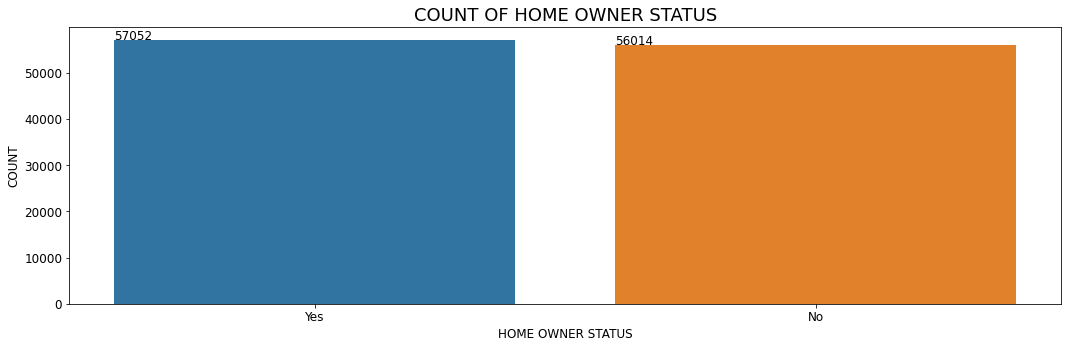

In [41]:
bar_chart(prosper, xa = 'isborrowerhomeowner', x_label = 'home owner status', y_label = 'count', title = 'count of home owner status')

### Observation
> The bulk of borrowers own their homes coming to a total count of 57,052 while the total of 56,014 borrowers do not own their homes. this is an almost even split.

###  Question
> What is the distribution of the credit rating among the loans

In [42]:
# check to see the counts of various credit ratings
credit_rating_counts = prosper['credit_rating'].value_counts().sort_index()
credit_rating_counts

A     17705
AA     8834
B     19757
C     23745
D     19323
E     13005
HR    10425
NC      141
U       131
Name: credit_rating, dtype: int64

### Visualization

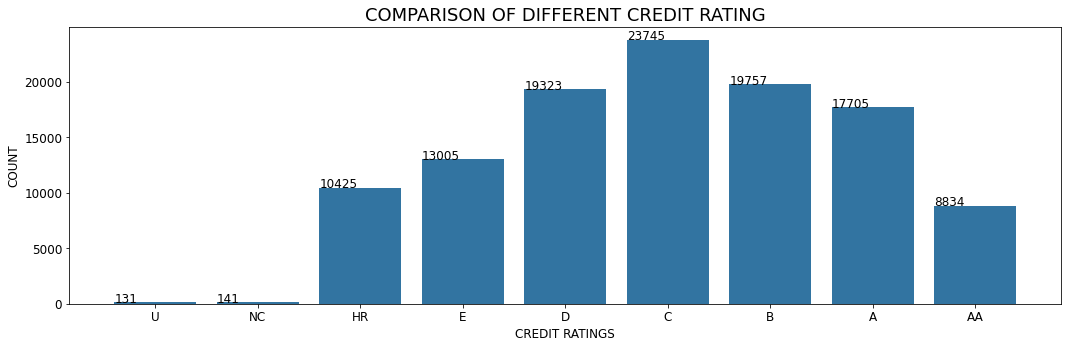

In [43]:
# Visualize this data with a count plot
bar_chart(prosper, xa = 'credit_rating', color = dark_blue, x_label = 'credit ratings', y_label = 'count',
             order = ['U', 'NC', 'HR', 'E', 'D', 'C', 'B',  'A', 'AA', ] , 
             title = 'Comparison of different Credit rating');

### Observation
>**Note**: The graph has been ordered from left to right to show heirarchy. beginning from U which represents the total number of borrowers whose credit rating was unknown through to AA which represents borrowers with the highest credit ratings.
we can see that those with credit ratings 'C' rank higher in terms of loan collection.

###  Question
> Which state has the largest number of borrowers

In [44]:
prosper['borrowerstate'].unique()

array(['COLORADO', 'GEORGIA', 'MINNESOTA', 'NEW MEXICO', 'KANSAS',
       'CALIFORNIA', 'ILLINOIS', 'MARYLAND', 'unlisted', 'ALABAMA',
       'ARIZONA', 'VIRGINIA', 'FLORIDA', 'PENNSYLVANIA', 'OREGON',
       'MICHIGAN', 'NEW YORK', 'LOUISIANA', 'WISCONSIN', 'OHIO',
       'NORTH CAROLINA', 'WASHINGTON', 'NEVADA', 'NEW JERSEY', 'TEXAS',
       'ARKANSAS', 'SOUTH CAROLINA', 'DELAWARE', 'MISSOURI', 'NEBRASKA',
       'UTAH', 'DISTRICT OF COLUMBIA', 'MASSACHUSETTS', 'CONNECTICUT',
       'INDIANA', 'KENTUCKY', 'OKLAHOMA', 'MISSISSIPPI', 'WEST VIRGINIA',
       'RHODE ISLAND', 'TENNESSEE', 'IDAHO', 'MONTANA', 'HAWAII',
       'NEW HAMPSHIRE', 'VERMONT', 'WYOMING', 'MAINE', 'ALASKA', 'IOWA',
       'SOUTH DAKOTA', 'NORTH DAKOTA'], dtype=object)

In [45]:
borrower_state_order = prosper['borrowerstate'].value_counts().index

### Visualization

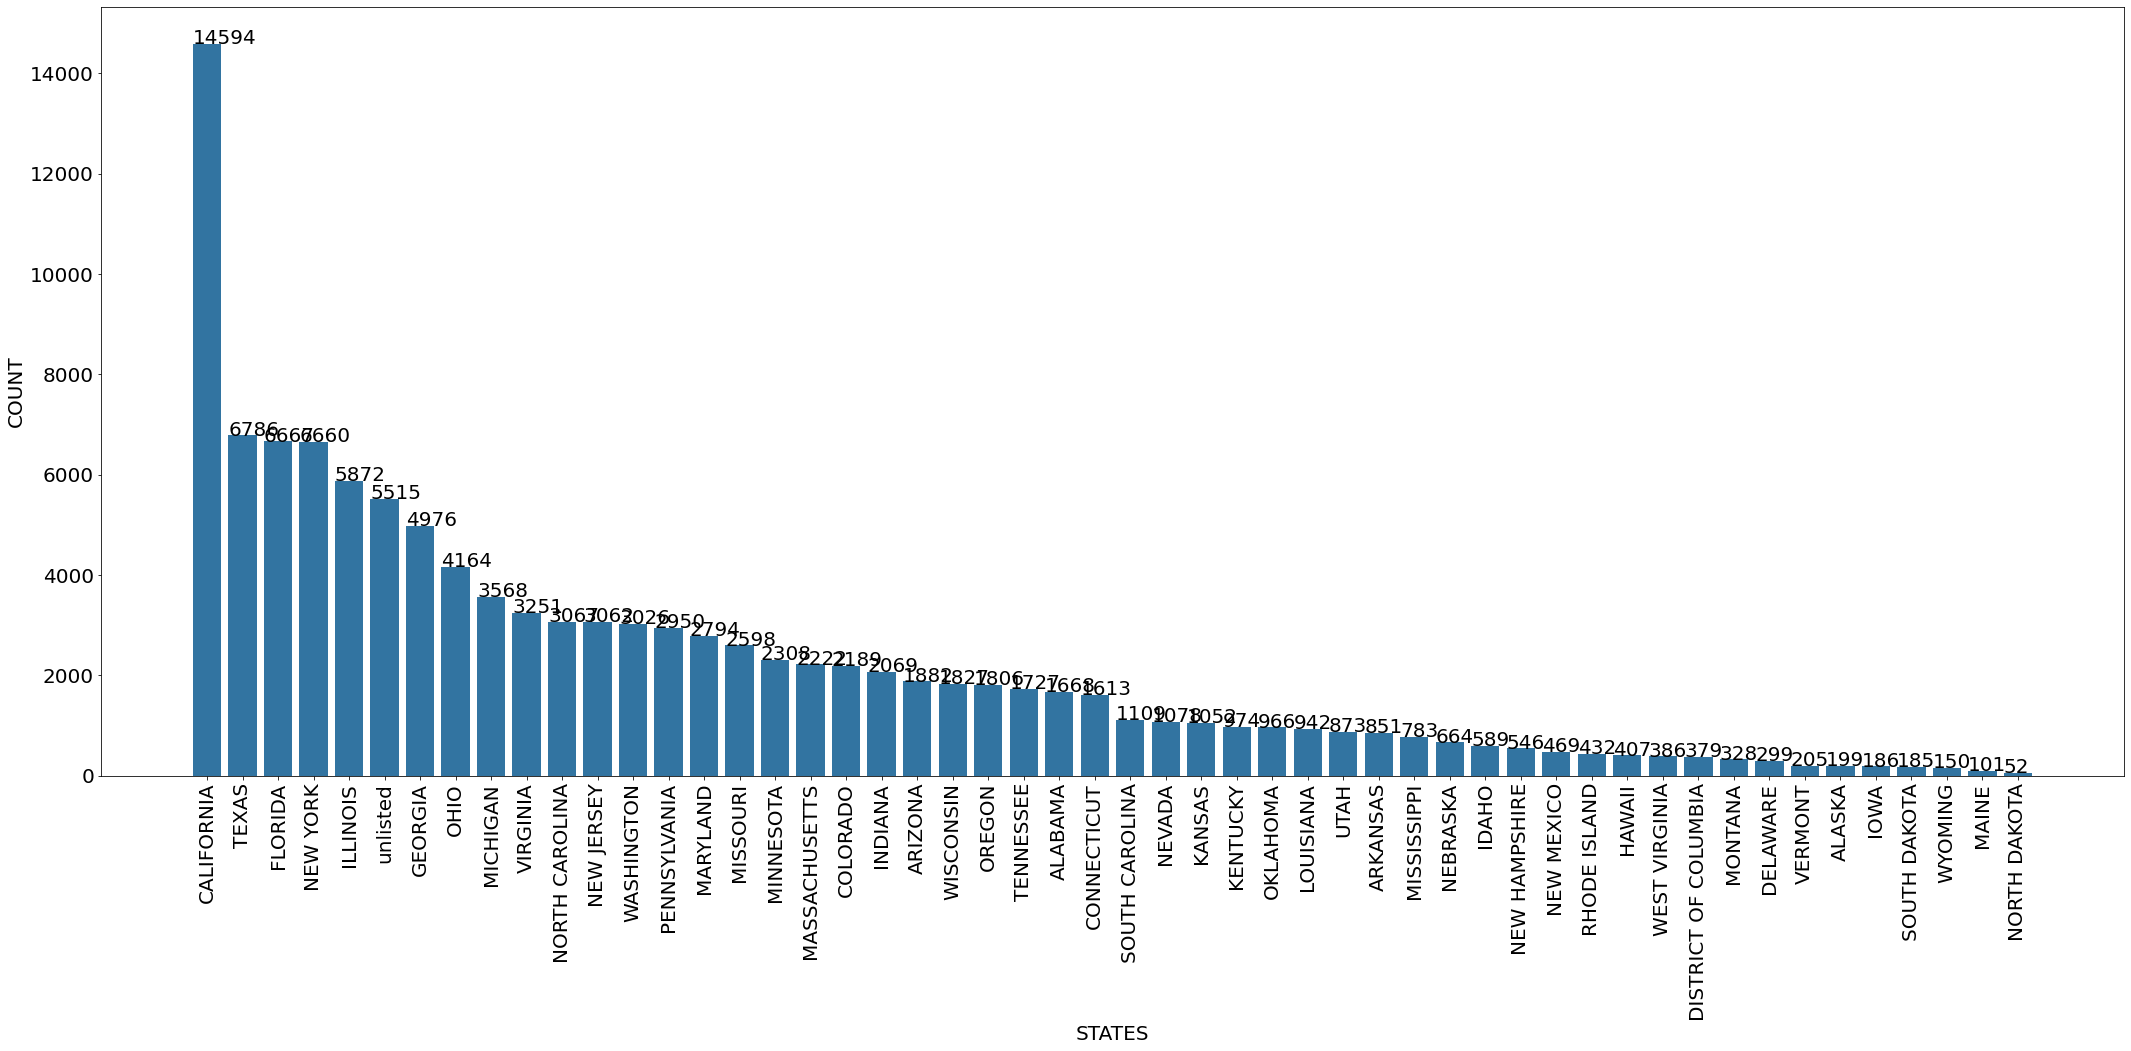

In [46]:
bar_chart(prosper, xa = 'borrowerstate', tick_rotation = 90, color = dark_blue, fig_size = (30,15),pfont = 20,
          tfont = 20, bartext_fontsize = 20, order = borrower_state_order, x_label = 'states', y_label = 'count')

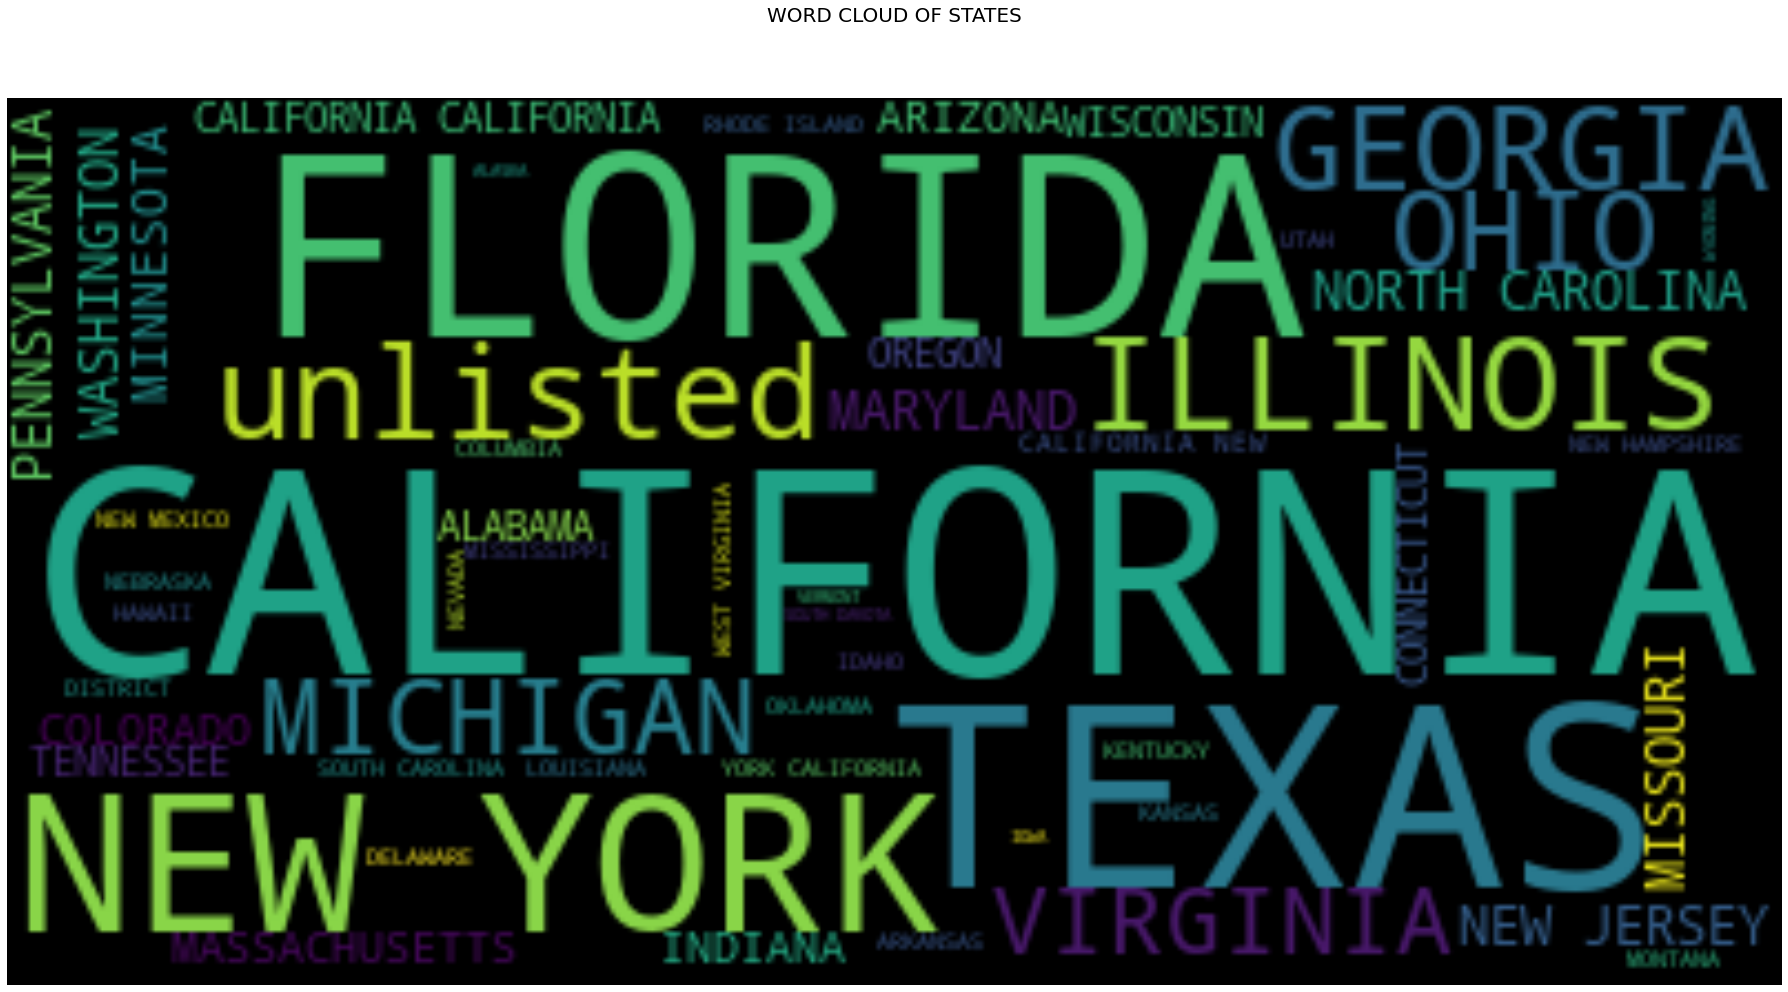

In [84]:
text = "".join(i for i in str(prosper['borrowerstate']))
plot_word_count(text, max_pfont = 100, title = 'word cloud of states', pfont = 20, fig_size = (25,15))

### Observation
> California with a count of 14,594 ranks highest amongst other states,south Dakota, Wwyoming, Maine, and Dakota are at the tail end of the group

###  Question
> What is the composition of loans by terms

In [48]:
# replace the numerical value to categorical term
prosper['term'] = prosper['term'].map({36: 'medium term', 60: 'long term', 12: 'short term'})
# convert to categorical data type
prosper['term'] = prosper['term'].astype('category')
term_counts = prosper['term'].value_counts()

In [49]:
prosper['term'].value_counts()

medium term    87224
long term      24228
short term      1614
Name: term, dtype: int64

### Visualization

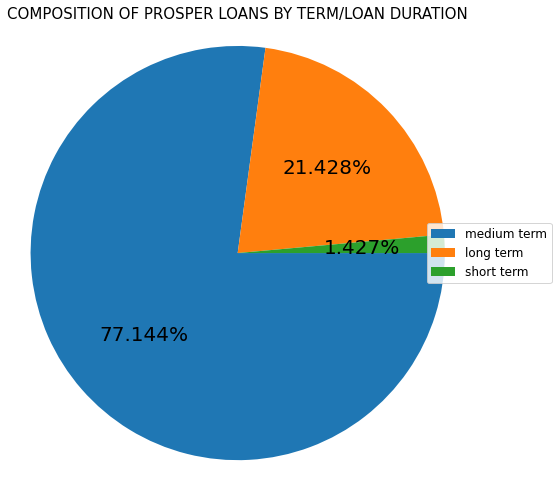

In [50]:
pie_chart(term_counts, title = "composition of prosper loans by term/loan duration", title_fontsize = 15)

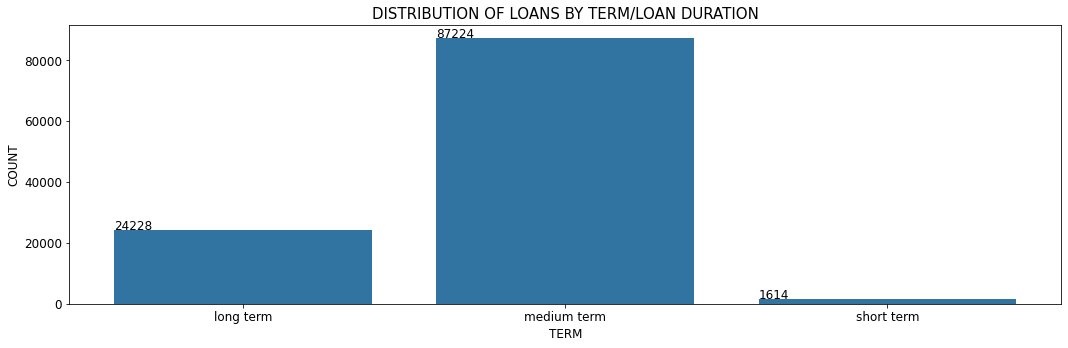

In [51]:
bar_chart(prosper, color = dark_blue,  xa = 'term', title = 'distribution of loans by term/loan duration', 
           title_fontsize = 15, x_label = 'term', y_label = 'count')

### Observations
> Medium term loans seem to be more favorable for borrowers as most of them take out medium term loans. it would be great to analyze this for more insight into this phenomenom

### Question
> What is the distribution of loan status

In [52]:
loan_status_order = prosper['loanstatus'].value_counts().index

### Visualization

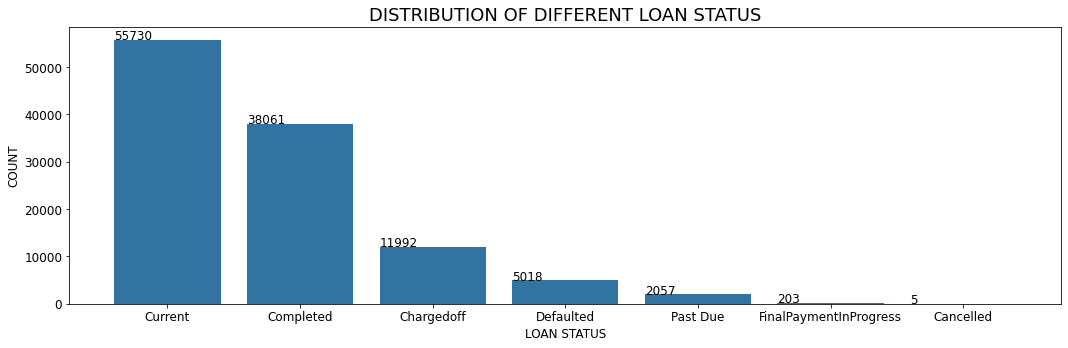

In [53]:
bar_chart(prosper, xa = 'loanstatus', title = 'distribution of different loan status', 
           color = dark_blue, order = loan_status_order, x_label = 'Loan status', y_label = 'count')

### Observation
> 5018 loans defaulted, 2057 loans past their due dates and only just 5 cancelled. the ratio of completed loans to loans charged off seems to suggest that prosper loans do not have arrangements in place to ensure repayments and collections

### Question
> what is the distribution of borrower annual percentage rate

### Visualization

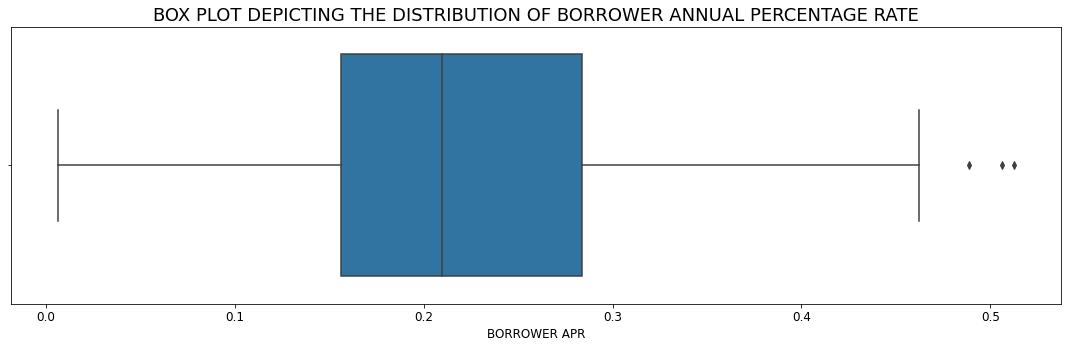

In [54]:
box_plot(prosper, xa = 'borrowerapr', univariate = True, fig_size = (15,5), x_label = 'borrower apr'
             ,title = 'box plot depicting the distribution of borrower annual percentage rate')

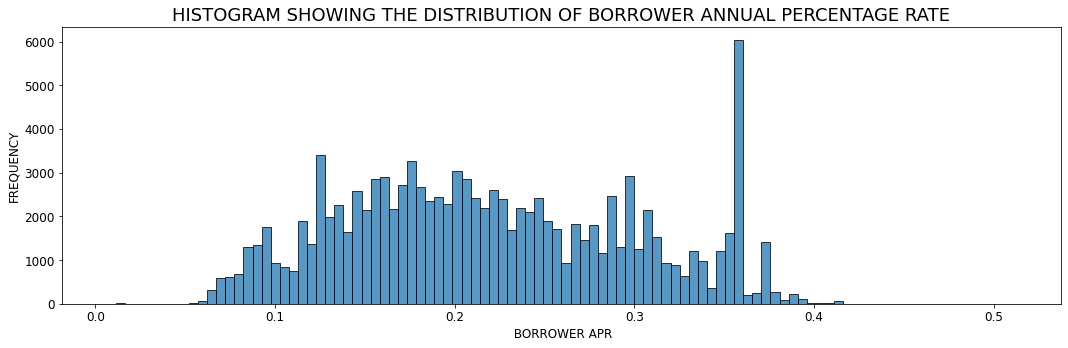

In [55]:
sb_histogram(prosper, xa = 'borrowerapr', fig_size =(15,5), plot_bin_number = 100, x_label =" borrower apr",
             title = 'Histogram showing the distribution of borrower annual percentage rate', y_label = 'frequency')

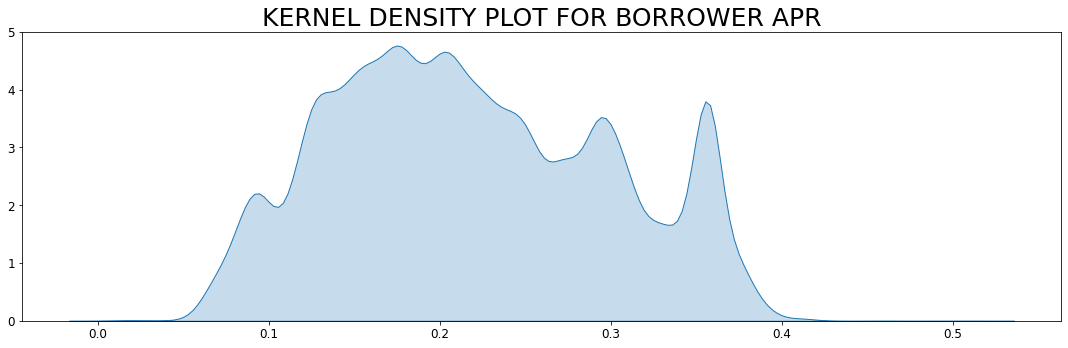

In [56]:
kde(prosper, xa = 'borrowerapr', should_fill = True, pfont = 25, title ='kernel density plot for borrower apr')

### Observation
> plot appears bimodal, assymetrical. There seems to be a few outliers as shown from the box plot

### Question
> What is the distribution of the borrower rates

### Visualization

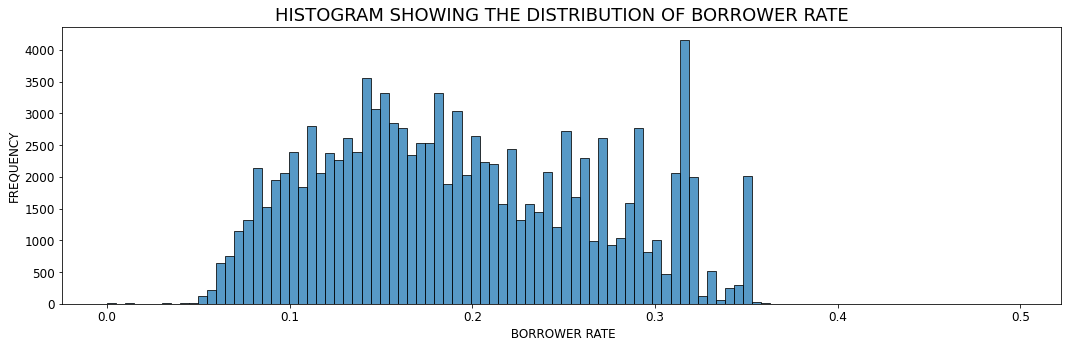

In [57]:
sb_histogram(prosper, xa = 'borrowerrate', fig_size =(15,5), plot_bin_number = 100, x_label =" borrower rate",
             title = 'Histogram showing the distribution of borrower rate', y_label = 'frequency')

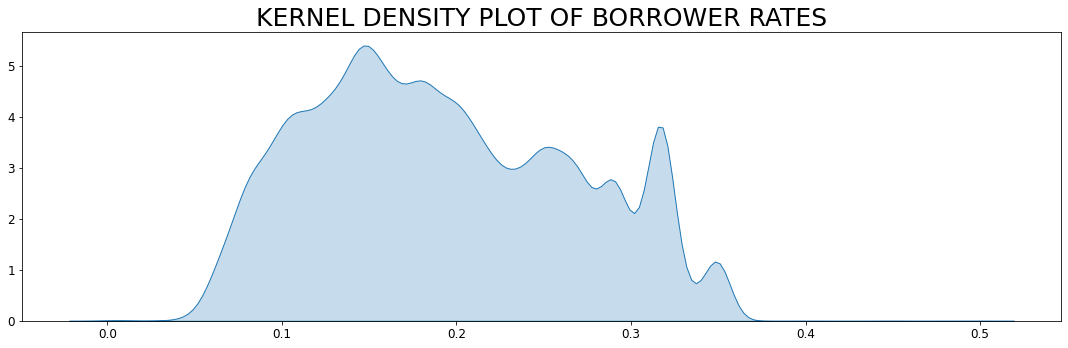

In [58]:
kde(prosper, xa = 'borrowerrate', should_fill = True, title = 'kernel density plot of borrower rates', pfont = 25)

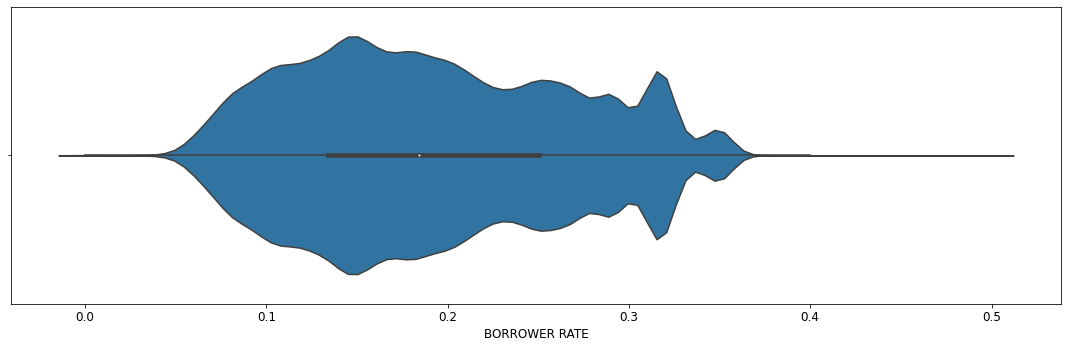

In [59]:
violin(prosper, xa = 'borrowerrate', univariate = True, fig_size = (15,5), x_label = 'borrower rate')

### Observation
> distribution appears bimodal, with a few outliers

### Question

### Visualization

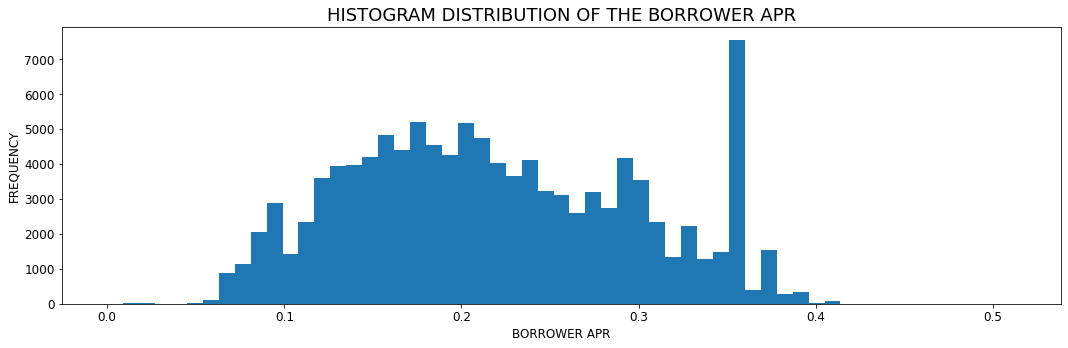

In [60]:
plt_histogram(prosper, xa ='borrowerapr', bin_num = 0.009, title = 'histogram distribution of the borrower apr',
             x_label = 'borrower apr', y_label ='frequency', fig_size = (15,5))

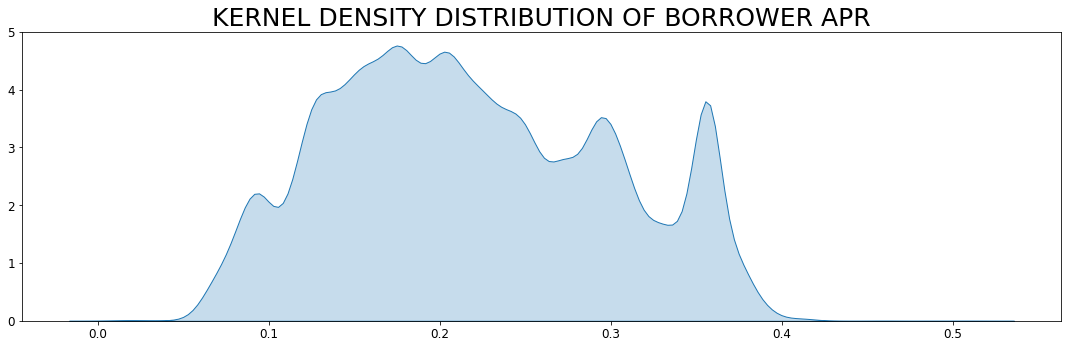

In [61]:
kde(prosper, xa = 'borrowerapr',should_fill = True, title ='kernel density distribution of borrower apr', pfont = 25)

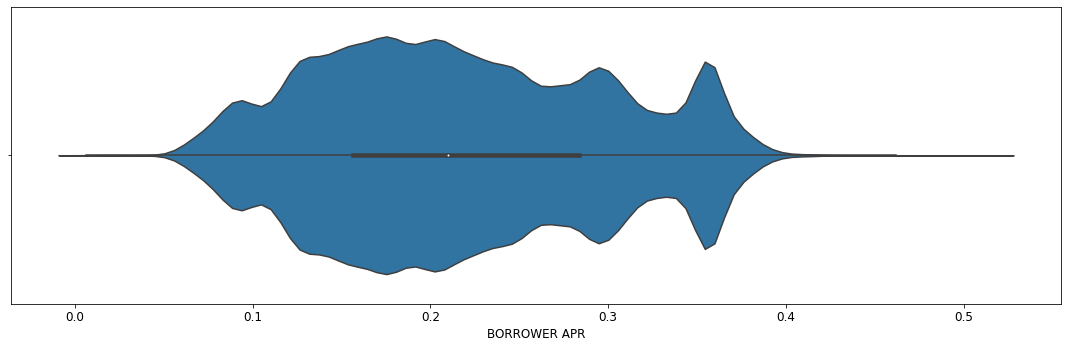

In [62]:
violin(prosper, xa = 'borrowerapr', univariate = True, fig_size = (15,5), x_label = 'borrower apr')

### Observation

### 14. Question
> What is the distribution of Loan original amount

In [63]:
prosper['loanoriginalamount'].isnull().sum()

0

### Visualization

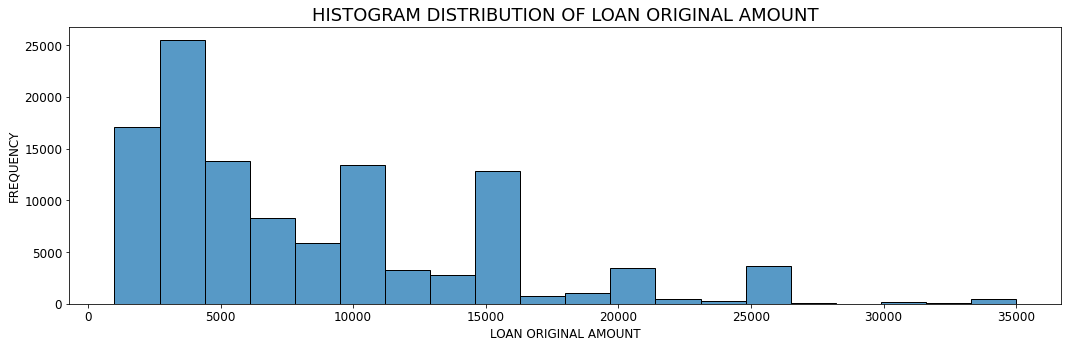

In [64]:
sb_histogram(prosper, xa = 'loanoriginalamount', x_label ='loan original amount', y_label = 'frequency', title =
            'histogram distribution of loan original amount', plot_bin_number = 20)

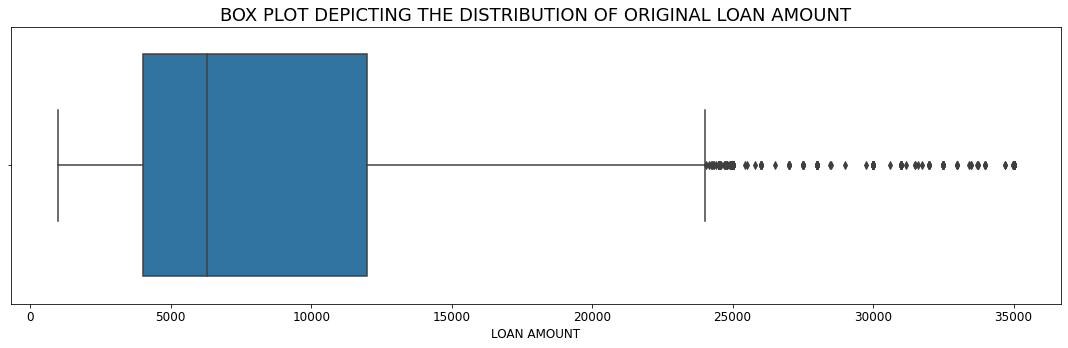

In [65]:
box_plot(prosper, xa = 'loanoriginalamount', univariate = True, fig_size = (15,5), 
             title = 'box plot depicting the distribution of original loan amount', x_label = 'Loan amount')

### Observation
> Loan original amount is right skewed with outliers

### 15. Question
> What is the distribution of the Stated monthly Income

### Visualization

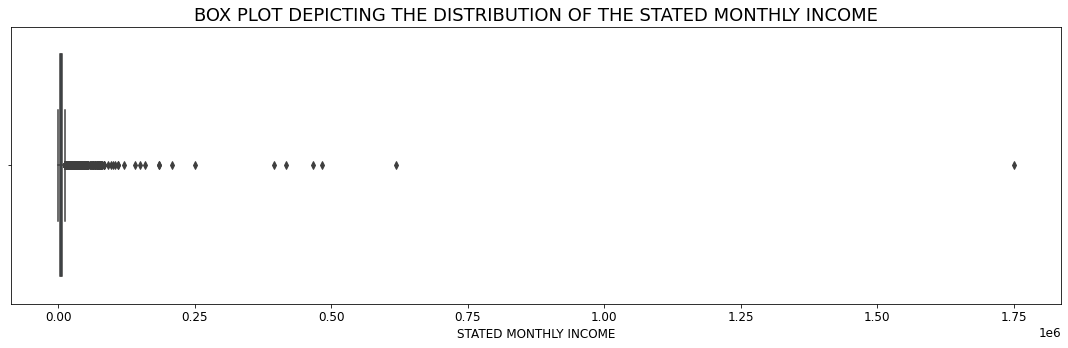

In [66]:
box_plot(prosper, xa = 'statedmonthlyincome', univariate = True, fig_size = (15,5), 
             title ='box plot depicting the distribution of the stated monthly income', x_label = 'stated monthly income')

### Observation
> Stated Monthly Income has the Presence of outliers and is skewed to the right

### 16. Question
> What is the distribution of loans by year of origination

In [67]:
prosper['loanoriginationdate'].dtypes

dtype('O')

In [68]:
prosper[prosper['loanoriginationdate'].isnull()]

Empty DataFrame
Columns: [index, listingkey, listingnumber, listingcreationdate, creditgrade, term, loanstatus, closeddate, borrowerapr, borrowerrate, lenderyield, estimatedeffectiveyield, estimatedloss, estimatedreturn, prosperrating (numeric), prosperrating (alpha), prosperscore, listingcategory (numeric), borrowerstate, occupation, employmentstatus, employmentstatusduration, isborrowerhomeowner, currentlyingroup, groupkey, datecreditpulled, creditscorerangelower, creditscorerangeupper, firstrecordedcreditline, currentcreditlines, opencreditlines, totalcreditlinespast7years, openrevolvingaccounts, openrevolvingmonthlypayment, inquirieslast6months, totalinquiries, currentdelinquencies, amountdelinquent, delinquencieslast7years, publicrecordslast10years, publicrecordslast12months, revolvingcreditbalance, bankcardutilization, availablebankcardcredit, totaltrades, tradesneverdelinquent (percentage), tradesopenedlast6months, debttoincomeratio, incomerange, incomeverifiable, statedmonthlyincome, loankey, totalprosperloans, totalprosperpaymentsbilled, ontimeprosperpayments, prosperpaymentslessthanonemonthlate, prosperpaymentsonemonthpluslate, prosperprincipalborrowed, prosperprincipaloutstanding, scorexchangeattimeoflisting, loancurrentdaysdelinquent, loanfirstdefaultedcyclenumber, loanmonthssinceorigination, loannumber, loanoriginalamount, loanoriginationdate, loanoriginationquarter, memberkey, monthlyloanpayment, lp_customerpayments, lp_customerprincipalpayments, lp_interestandfees, lp_servicefees, lp_collectionfees, lp_grossprincipalloss, lp_netprincipalloss, lp_nonprincipalrecoverypayments, percentfunded, recommendations, investmentfromfriendscount, investmentfromfriendsamount, investors, credit_rating]
Index: []

In [69]:
# convert to datetime
prosper['loanoriginationdate'] = pd.to_datetime(prosper['loanoriginationdate'])

In [70]:
# extract year from the column
prosper['loanoriginationyear'] = pd.DatetimeIndex(prosper['loanoriginationdate']).year

In [71]:
prosper['loanoriginationyear'].value_counts()

2013    33912
2012    19553
2014    11734
2008    11552
2007    11460
2011    11228
2006     5906
2010     5652
2009     2047
2005       22
Name: loanoriginationyear, dtype: int64

In [72]:
prosper['loanoriginationyear'].dtypes

dtype('int64')

### Visualization

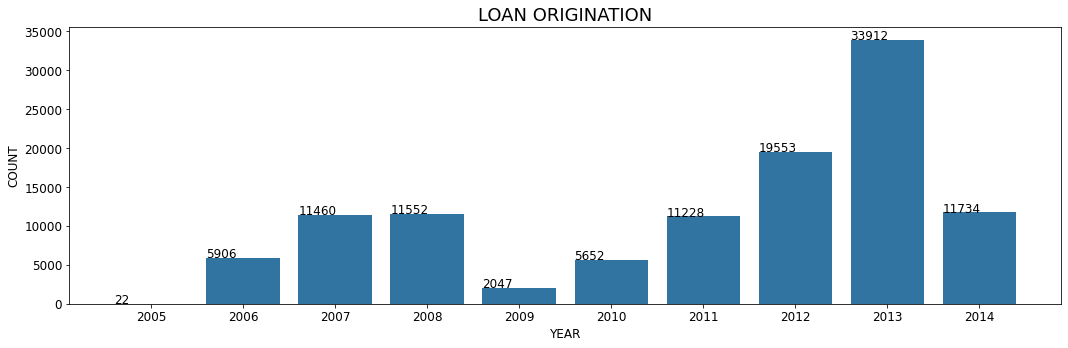

In [73]:
bar_chart(prosper, xa = 'loanoriginationyear', color = dark_blue, title = 'Loan origination',
           y_label = 'count', x_label = 'year');

### Observation
> 2013 saw the highest number of loans given out at 33912 loans while the lowest recorded loans given out was in 2005

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Some of the variables had outliers, their symmetry ranged from symetrical, asymmetrical, unimodal, bimodal and multimodal.


## Bivariate Exploration

### Question

> What is the relationship between the borrower apr and borrower rate

### Visualization

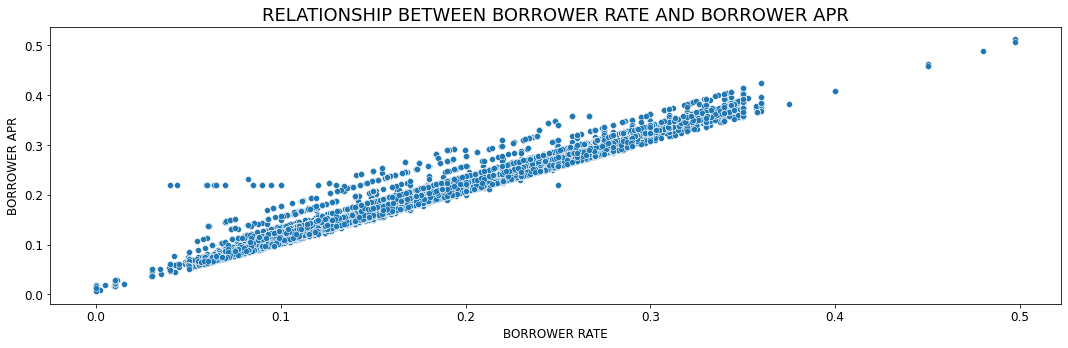

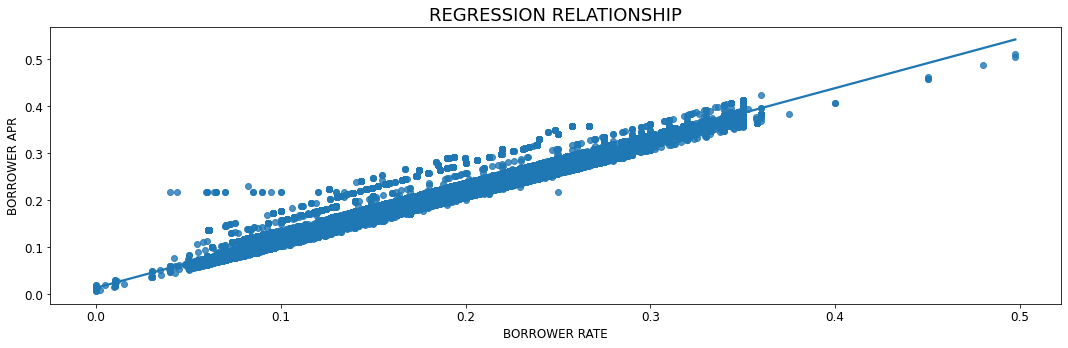

In [74]:
sb_scatter_plot(prosper, xa = "borrowerrate", x_label ='Borrower rate', ya = 'borrowerapr', y_label ='borrower apr',
                title='relationship between borrower rate and borrower apr', reg_title = 'regression relationship',
                fig_size= (15,5), reg_plot = True )

### Observation
> There is a positive correlation between the borrower rate and the borrower apr

### Question
> what is the relationship between occupation and estimatedreturn

### Visualization

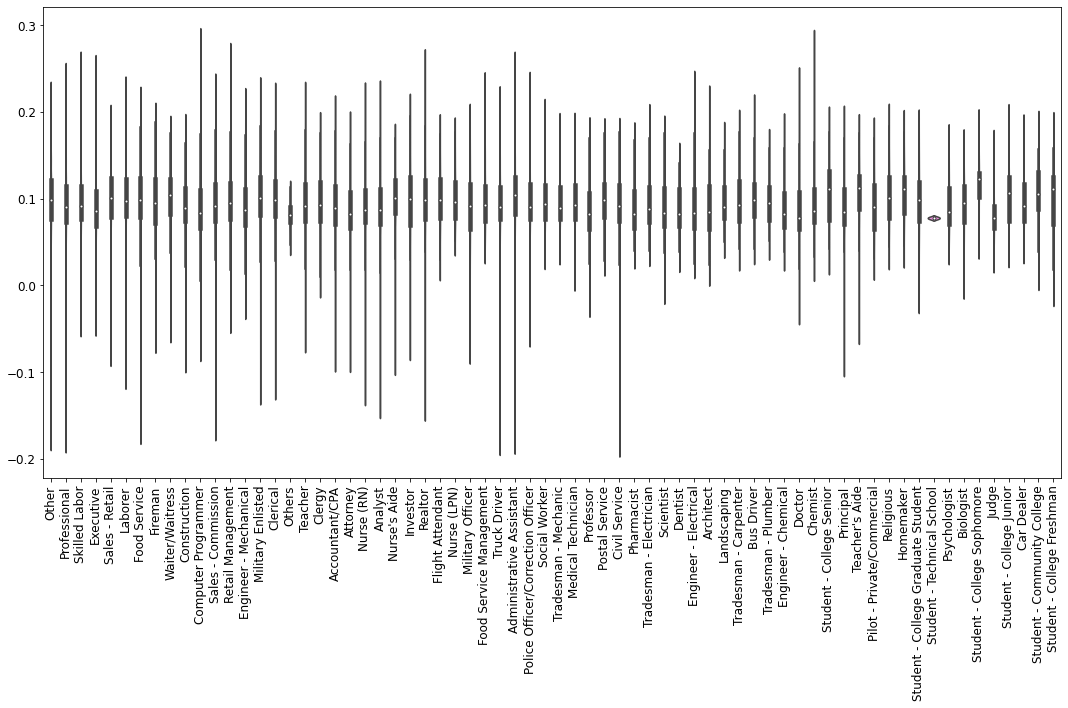

In [75]:
violin(prosper, xa = 'occupation', ya = 'estimatedreturn', tick_rotation = 90, bivariate = True)

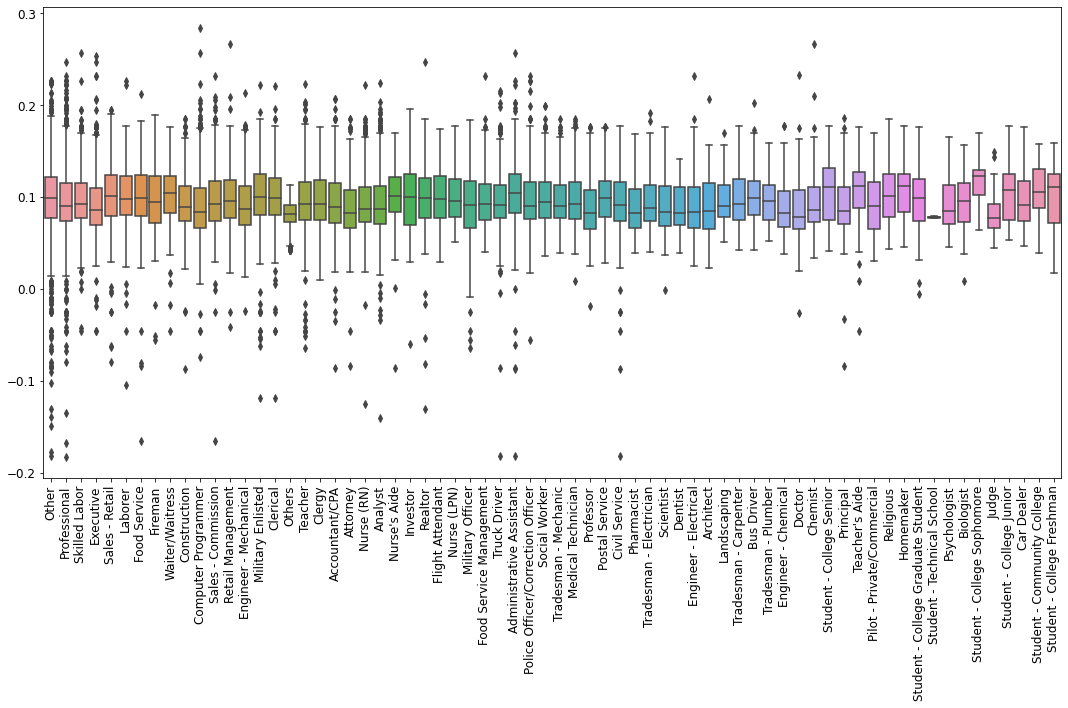

In [76]:
box_plot(prosper, xa = 'occupation', ya = 'estimatedreturn', tick_rotation = 90, bivariate = True)

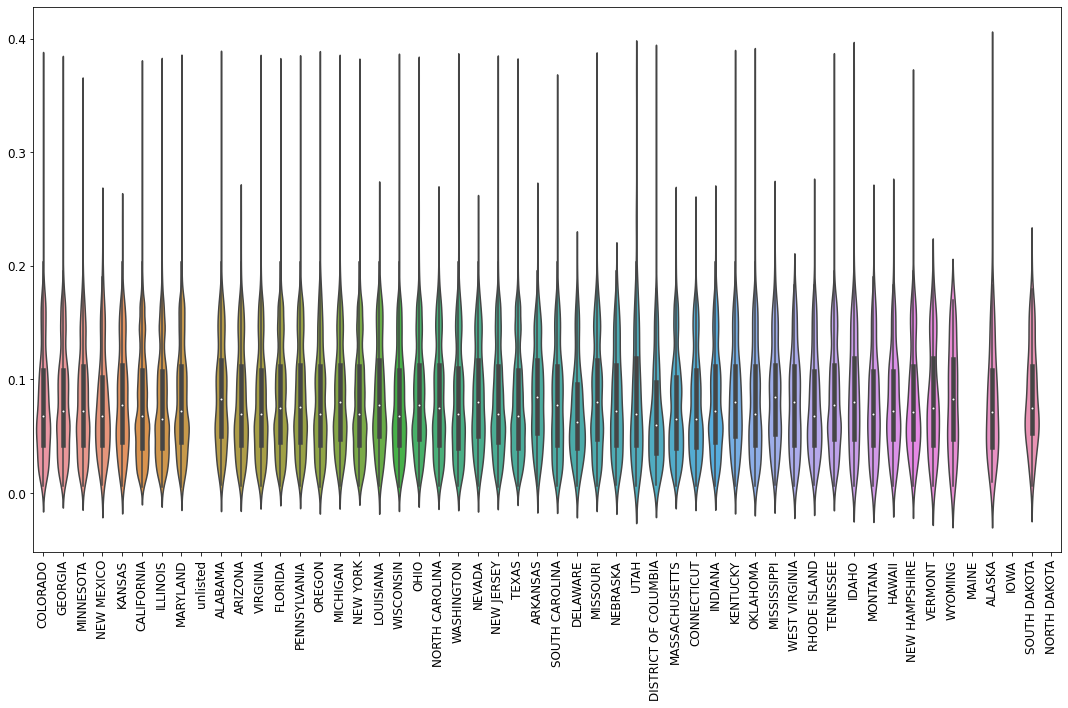

In [77]:
violin(prosper, xa ='borrowerstate', ya = 'estimatedloss', bivariate = True , tick_rotation = 90,)

<Figure size 1080x720 with 0 Axes>

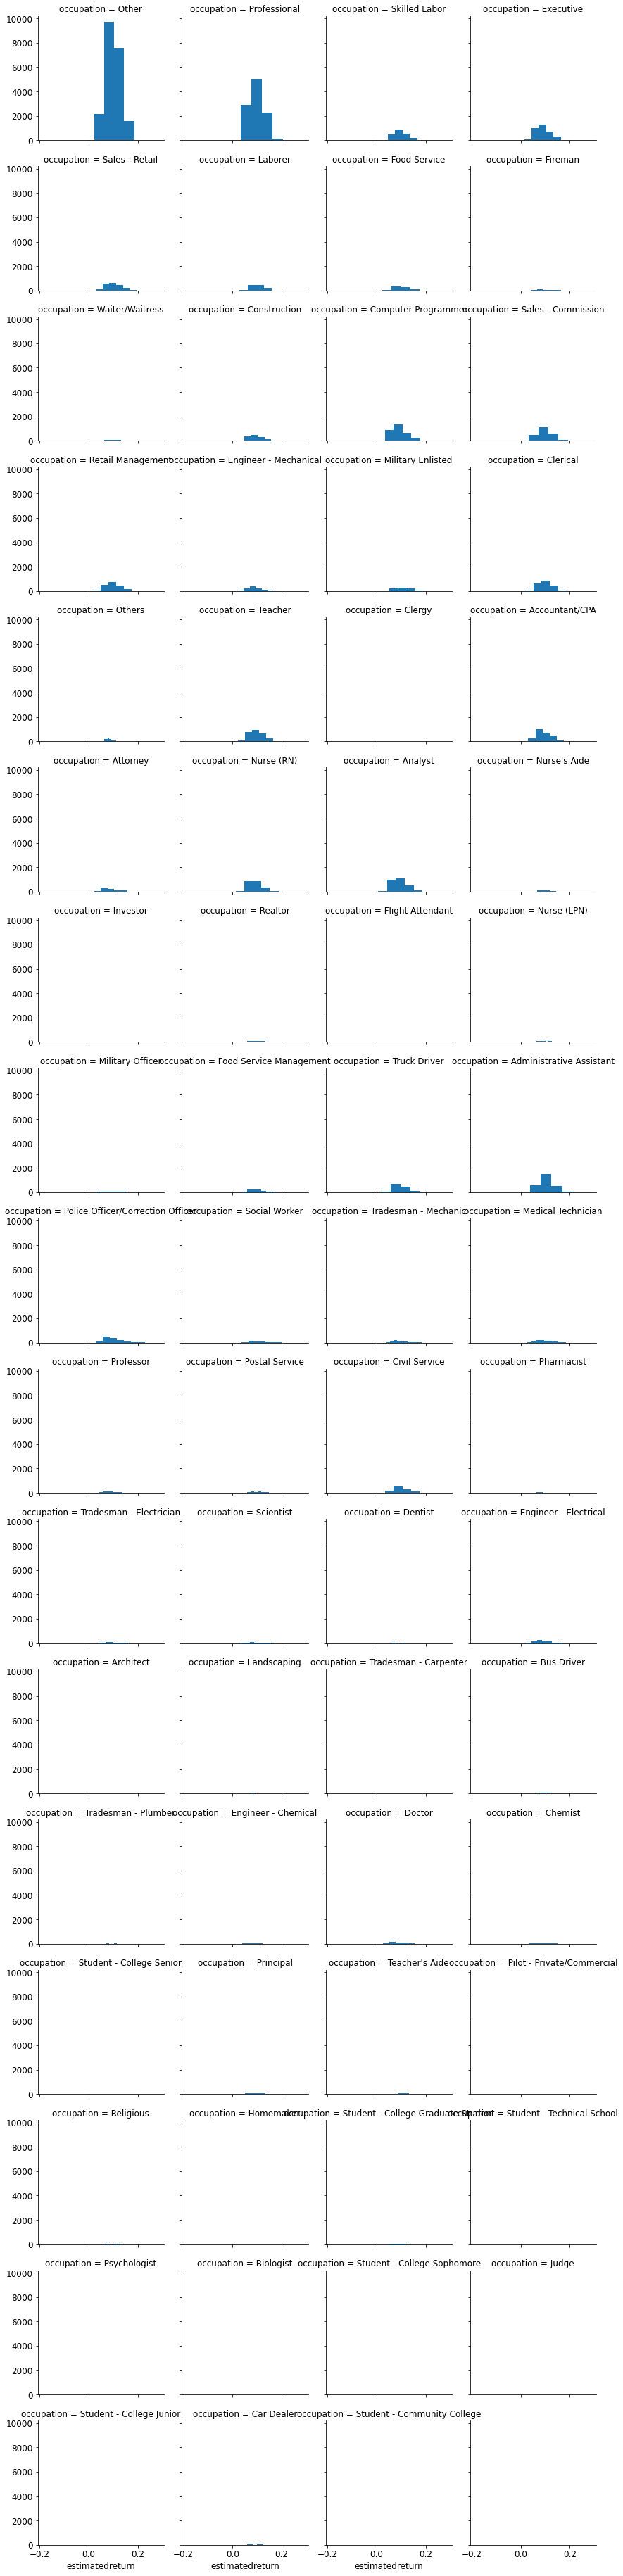

In [78]:
faceting(prosper, xa = 'occupation', ya = 'estimatedreturn', )

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


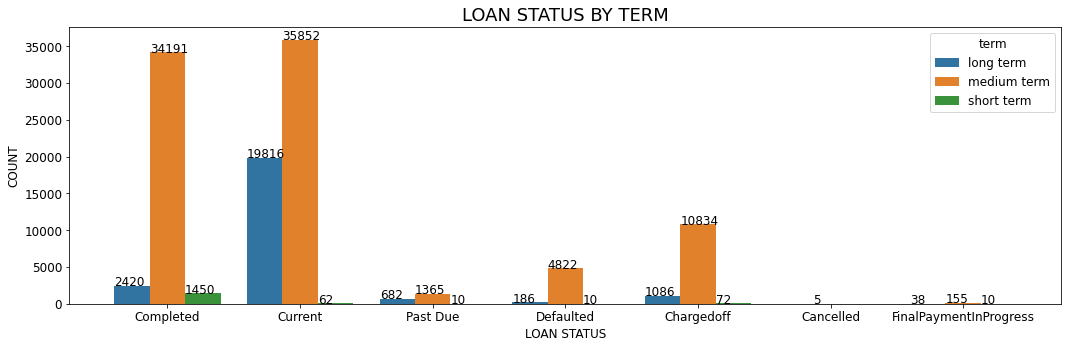

In [79]:
bar_chart(prosper, xa = 'loanstatus', plot_hue ='term', x_label = 'Loan status', y_label = 'count', title ='loan status by term')

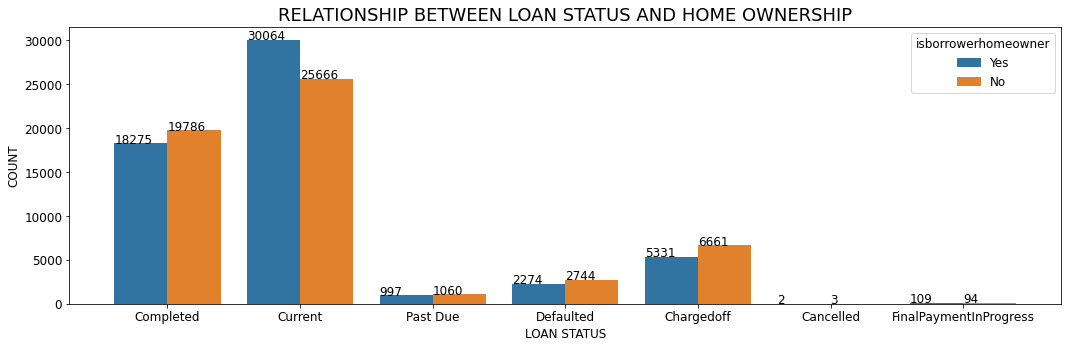

In [80]:
bar_chart(prosper, xa = 'loanstatus', plot_hue ='isborrowerhomeowner', x_label = 'Loan status', y_label = 'count',
           title ='Relationship between loan status and home ownership')

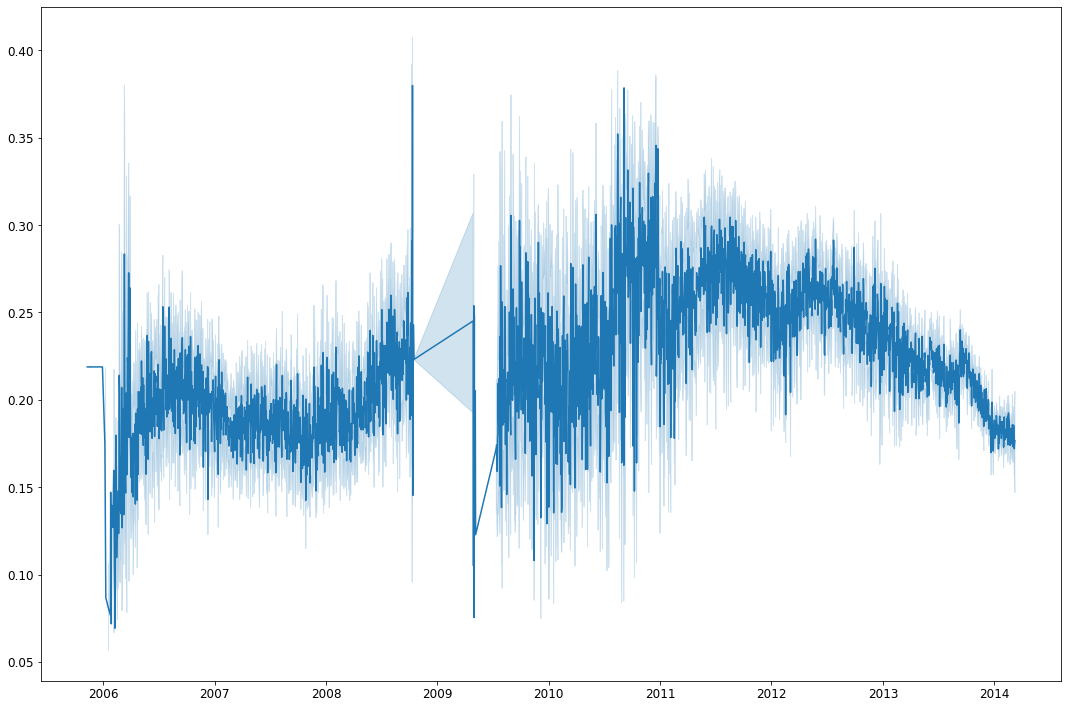

In [81]:
prosper['listingcreationdate'] = pd.to_datetime(prosper['listingcreationdate']).dt.date
line_plot(prosper, xa = 'listingcreationdate', ya = 'borrowerapr')

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

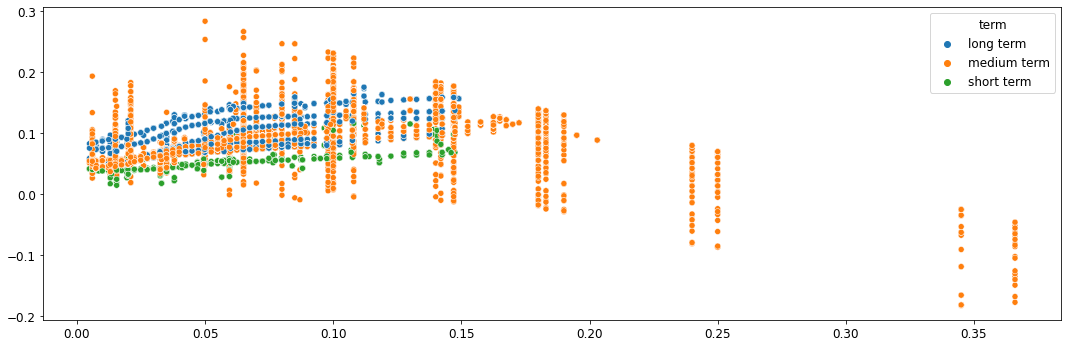

In [82]:
sb_scatter_plot(prosper, xa ='estimatedloss', ya = 'estimatedreturn', plot_hue = 'term')

In [83]:
prosper.to_csv('prosper_loandf_cleaned.csv', index = False, encoding='utf-8')

## Conclusions
>Before carrying out this study several transformations were carried out on the gathered dataset. To begin with, during the data cleaning process, null values in several columns were filled out. also, duplicate values in the loan key column were dropped. The loan origination date column was converted from object datatype to DateTime, afterward, the year was extracted from the DateTime before setting the data type of the extracted year column to a categorical type. I also changed the loan term values from the original numerical values, viz, 12 months, 36 months, and 60 months to short term, medium term, and long term respectively. Loan statuses that had values representing the number of days since overdue, were replaced with a single value-class named 'past due. Borrower state values were transformed from their abbreviations to full names of states while unlisted were given as class names to loans without a record of the states. I changed The data type of the occupation column from object data type to categorical data type. 
Loans taken for medium duration i.e 36 months, have the highest occurrence with a count of 87778 representing about 77 percent of loan term duration, leaving the other 23 percent distributed between the long term (60 months) and short term (12 months)loan duration. The loan is distributed over 10 years from 2005 to 2014. 2013 saw the most loans disbursed with a total of 34345, followed by the years 2012 and 2014 respectively at second and third position. the least loan disbursement occurred in the year 2005, with a total of 22 disbursements.
 The distribution of the loan original amount is skewed to the right, and bi-modal shows the presence of some outliers.